# Classification Problem

### import libraries

In [12]:
# importing required packages
import pandas as pd
import numpy as np
#Visualization
import seaborn as sns
sns.set(style='white')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, GroupKFold ,KFold, RandomizedSearchCV
# classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
#metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score

### Load data

In [13]:
df = pd.read_csv('train.csv')

In [14]:
df.shape

(614, 13)

In [15]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [16]:
# Now lets understand the data
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### From the above info it can be vivdly seen that 
- There are 8 object types, 1 int, 4 float types (total 13 columns) and there are 614 instances

In [18]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [19]:
df[ ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']].describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
count,601,611,599,614,582,614
unique,2,2,4,2,2,3
top,Male,Yes,0,Graduate,No,Semiurban
freq,489,398,345,480,500,233


In [20]:
df.isnull().sum()  # Now lets check how many null values we have in each column

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Univaraiate analysis for categorical features

The proportion of YES class : 0.69
The proportion of NO class : 0.31


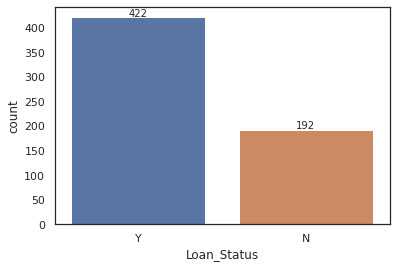

In [21]:
plot1 = sns.countplot(x ='Loan_Status', data = df)
for p in plot1.patches:
    plot1.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points')
print('The proportion of YES class : %.2f' % (df['Loan_Status'].value_counts()[0] / len(df)))
print('The proportion of NO class : %.2f' % (df['Loan_Status'].value_counts()[1] / len(df)))

The proportion of Male : 0.80
The proportion of Female : 0.18


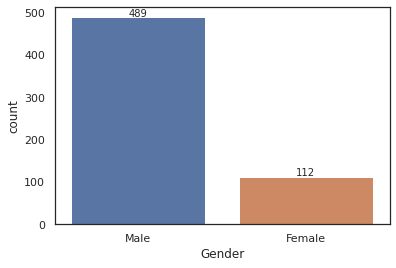

In [22]:
# Bar Graph for Gender
plot2 = sns.countplot(x ='Gender', data = df)
for p in plot2.patches:
    plot2.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points')
print('The proportion of Male : %.2f' % (df['Gender'].value_counts()[0] / len(df)))
print('The proportion of Female : %.2f' % (df['Gender'].value_counts()[1] / len(df)))

The proportion of applicants with 0 dependents : 0.56
The proportion of applicants with 1 dependents  : 0.17
The proportion of applicants with 2 dependents  : 0.16
The proportion of applicants with 3+ dependents  : 0.08


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


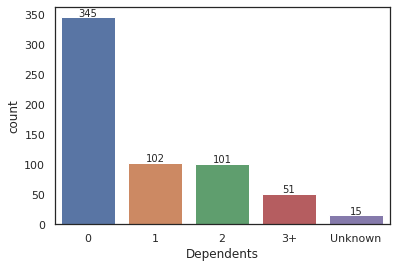

In [23]:
# Bar graph for dependents 
plot3 = sns.countplot(df['Dependents'].fillna('Unknown'))
for p in plot3.patches:
    plot3.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points')
print('The proportion of applicants with 0 dependents : %.2f' % (df['Dependents'].value_counts()[0] / len(df)))
print('The proportion of applicants with 1 dependents  : %.2f' % (df['Dependents'].value_counts()[1] / len(df)))
print('The proportion of applicants with 2 dependents  : %.2f' % (df['Dependents'].value_counts()[2] / len(df)))
print('The proportion of applicants with 3+ dependents  : %.2f' % (df['Dependents'].value_counts()[3] / len(df)))

The proportion of Graduate : 0.78
The proportion of Not Graduate : 0.22


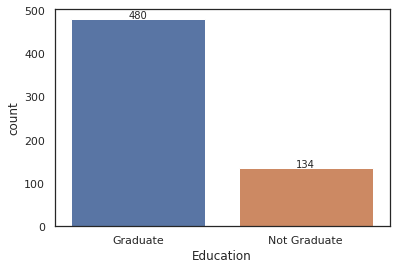

In [24]:
# Bar graph for applicants education
plot4 = sns.countplot(x ='Education', data = df)
for p in plot4.patches:
    plot4.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points')
print('The proportion of Graduate : %.2f' % (df['Education'].value_counts()[0] / len(df)))
print('The proportion of Not Graduate : %.2f' % (df['Education'].value_counts()[1] / len(df)))

The proportion of Yes : 0.13
The proportion of No : 0.81


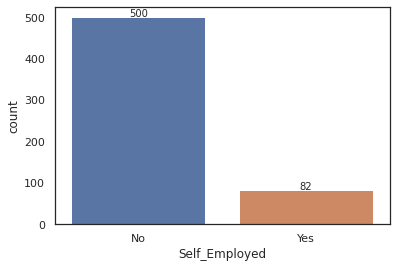

In [25]:
# Bar graph of SelfEmployed
plot5 = sns.countplot(x ='Self_Employed', data = df)
for p in plot5.patches:
    plot5.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points')
print('The proportion of Yes : %.2f' % (df['Self_Employed'].value_counts()[1] / len(df)))
print('The proportion of No : %.2f' % (df['Self_Employed'].value_counts()[0] / len(df)))

The proportion of Urban : 0.38
The proportion of Rural : 0.33
The proportion of Semi-urban : 0.29


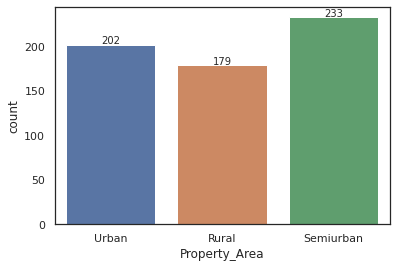

In [26]:
# Bar graph of Property_Area
plot6 = sns.countplot(x ='Property_Area', data = df)
for p in plot6.patches:
    plot6.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points')
print('The proportion of Urban : %.2f' % (df['Property_Area'].value_counts()[0] / len(df)))
print('The proportion of Rural : %.2f' % (df['Property_Area'].value_counts()[1] / len(df)))
print('The proportion of Semi-urban : %.2f' % (df['Property_Area'].value_counts()[2] / len(df)))

The proportion of Married : 0.65
The proportion of Single : 0.35


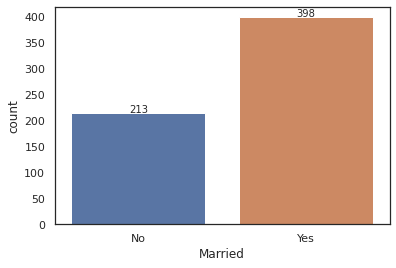

In [27]:
# Bar Graph for Marriage status
plot7 = sns.countplot(x ='Married', data = df)
for p in plot7.patches:
    plot7.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points')
print('The proportion of Married : %.2f' % (df['Married'].value_counts()[0] / len(df)))
print('The proportion of Single : %.2f' % (df['Married'].value_counts()[1] / len(df)))

In [28]:
df.pivot_table(columns="Married",index="Dependents", values="Loan_ID", aggfunc=len)

Married,No,Yes
Dependents,,
0,171,174
1,23,79
2,8,93
3+,7,44


### Univariate analysis for continous features

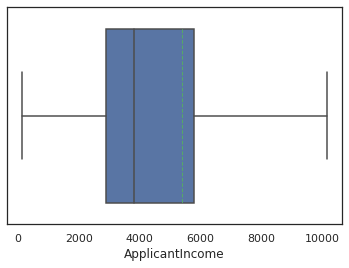

In [29]:
sns.boxplot(x="ApplicantIncome",data=df, showfliers=False, meanline=True, showmeans=True)

- Majority of the applicants incomes lies in between 2500 and 6000 and the average income is 4000

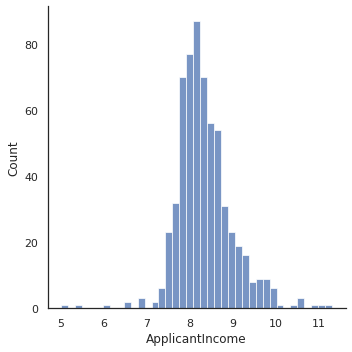

In [30]:
sns.displot(np.log(df.ApplicantIncome), kde=False)  

In [31]:
# There's slight skew to the left for the applicantincome

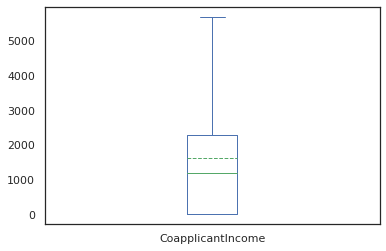

In [32]:
df.CoapplicantIncome.plot.box(showmeans=True, meanline=True, showfliers = False)

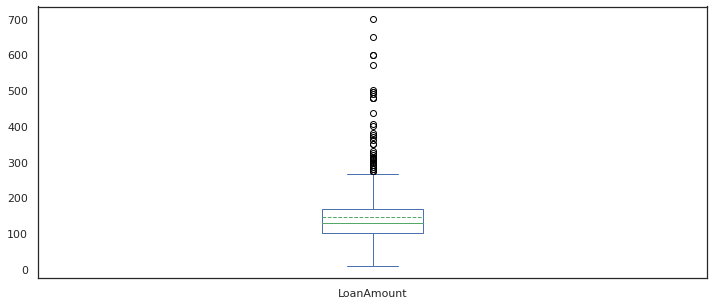

In [33]:
df.LoanAmount.plot.box(showfliers = True, meanline=True, showmeans= True)
plt.gcf().set_size_inches(12,5)

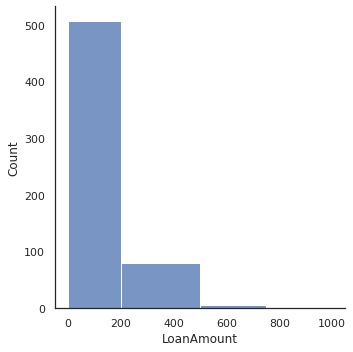

In [34]:
sns.displot(df['LoanAmount'], bins=[0,200,500,750,1000], kde=False)

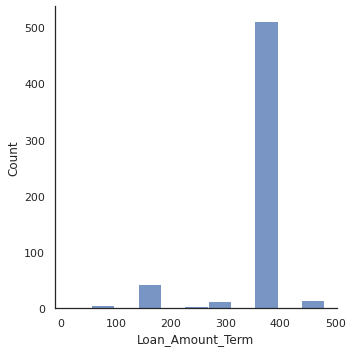

In [35]:
sns.displot(df["Loan_Amount_Term"], kde=False)

### Bi-variate analyis

In [36]:
group_property_area = df.pivot_table(index='Property_Area',columns="Loan_Status", values='Loan_ID',aggfunc=len)
print(group_property_area)

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


- It is evident that most of the loan applications are accepted for borrowers who live in semi-urban areas, followed by urban and rural areas

In [37]:
# Rejection rate 
group_property_area.iloc[:,0] / (group_property_area.iloc[:,0] + group_property_area.iloc[:,1])

Property_Area
Rural        0.385475
Semiurban    0.231760
Urban        0.341584
dtype: float64

- Rural areas have a greater rejection rate for applications.

In [38]:
# Acceptance rate 
group_property_area.iloc[:,1] / (group_property_area.iloc[:,0] + group_property_area.iloc[:,1])

Property_Area
Rural        0.614525
Semiurban    0.768240
Urban        0.658416
dtype: float64

- Likewise Urban locations have higher application acceptance rates.

In [39]:
df.groupby(['Property_Area','Loan_Status'])['Loan_ID'].count()

Property_Area  Loan_Status
Rural          N               69
               Y              110
Semiurban      N               54
               Y              179
Urban          N               69
               Y              133
Name: Loan_ID, dtype: int64

In [40]:
df.groupby(['Gender','Education'], as_index=False)['ApplicantIncome'].mean()

,Gender,Education,ApplicantIncome
0,Female,Graduate,4646.467391
1,Female,Not Graduate,4629.700000
2,Male,Graduate,5992.345745
3,Male,Not Graduate,3630.061947


-  As can be seen from the table above, male graduates have greater incomes, but interestingly, female graduates' incomes are nearly equal to those of non-graduates.

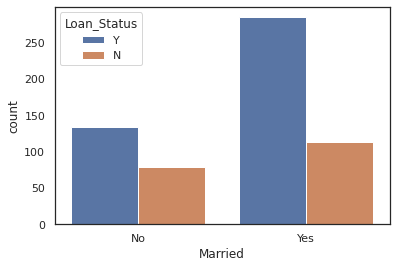

In [41]:
sns.countplot(x="Married", data = df, hue="Loan_Status")

- Loan approval rates are higher for applicants who are married and lower for candidates who are not married.

In [42]:
df.pivot_table(index = "Married", columns="Loan_Status", values='Loan_ID',aggfunc=len)

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


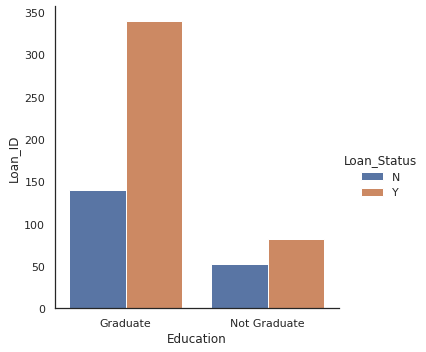

In [43]:
data_edu = df.groupby(by=["Loan_Status","Education"], as_index=False)['Loan_ID'].count()
sns.catplot(x="Education",y="Loan_ID", hue="Loan_Status", data=data_edu, kind="bar")

- Similarly, graduates have a greater loan acceptance rate than non-graduates.

  Loan_Status Property_Area  Count
0           N         Rural     69
1           N     Semiurban     54
2           N         Urban     69
3           Y         Rural    110
4           Y     Semiurban    179
5           Y         Urban    133


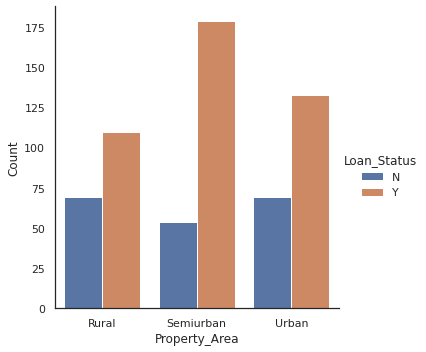

In [44]:
data = df.groupby(by=["Loan_Status","Property_Area"], as_index=False)['Loan_ID'].count()
data.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(data)
sns.catplot(x="Property_Area",y="Count", hue="Loan_Status", data=data, kind='bar')

  Loan_Status  Gender  Loan_ID
0           N  Female       37
1           N    Male      150
2           Y  Female       75
3           Y    Male      339


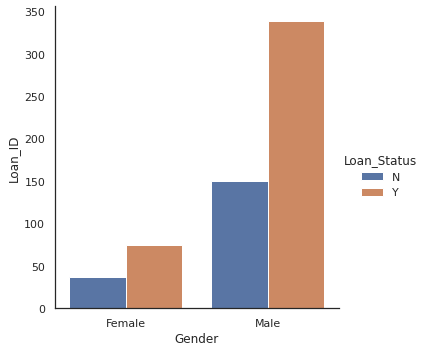

In [45]:
data1 = df.groupby(by=["Loan_Status","Gender"], as_index=False)['Loan_ID'].count()
print(data1)
sns.catplot(x="Gender",y="Loan_ID", hue="Loan_Status", data=data1, kind="bar")

In [46]:
# just for visual purpose, I've created bins for applicants_income and seperated as Low, Avg, High
bins=[0,100,200,700]
groups=['Low','Average','High']
df['LoanAmountBin']=pd.cut(df['LoanAmount'],bins,labels=groups)
df[['LoanAmount','LoanAmountBin']].head(10)

,LoanAmount,LoanAmountBin
0,NaN,NaN
1,128.0,Average
2,66.0,Low
3,120.0,Average
4,141.0,Average
5,267.0,High
6,95.0,Low
7,158.0,Average
8,168.0,Average
9,349.0,High


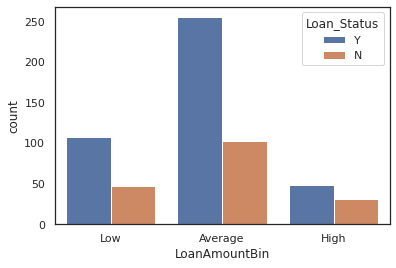

In [47]:
sns.countplot(x="LoanAmountBin", hue="Loan_Status", data=df)

### Bi-variate anlayis for continous variable

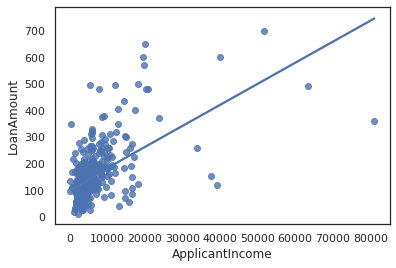

In [48]:
sns.regplot(x="ApplicantIncome", y = "LoanAmount", data = df,ci=False)

- It is clearly evident that the applicant's income and loan amount have positive correlation; the higher the income, the higher the likelihood of receiving a high income amount.

#### Data pre-processing

In [49]:
# lets replace the class variable as 0 and 1
df['Loan_Status'].replace('N',0,inplace=True)
df['Loan_Status'].replace('Y',1,inplace=True)

###### Replacing null values

In [50]:
null_values = df.isnull().sum()
null_values[null_values > 0]

Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
LoanAmountBin       22
dtype: int64

In [51]:
print(df['Dependents'].unique())
# replacing 3+ with 3 in dependents feature
df['Dependents'].replace(to_replace ='3+', value='3',inplace=True)

['0' '1' '2' '3+' nan]


In [52]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

In [53]:
print(df['Dependents'].value_counts())

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64


In [54]:
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

In [55]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

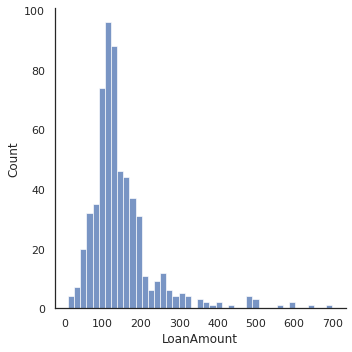

In [56]:
sns.displot(df["LoanAmount"], kde=False)
# since the distribution is slightlt skewed to the right, will replace LoanAmount with median value

In [57]:
# since the distribution has slight slight skew to the right, I've used median for replacing the null values
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [58]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [59]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [60]:
df.drop(['LoanAmountBin'], axis=1, inplace=True)

#### Label encoding for categorical features

In [61]:
columns = ['Gender',"Married","Education",'Self_Employed',"Property_Area"]
le = LabelEncoder()
for column in columns:
    df[column] = le.fit_transform(df[column])

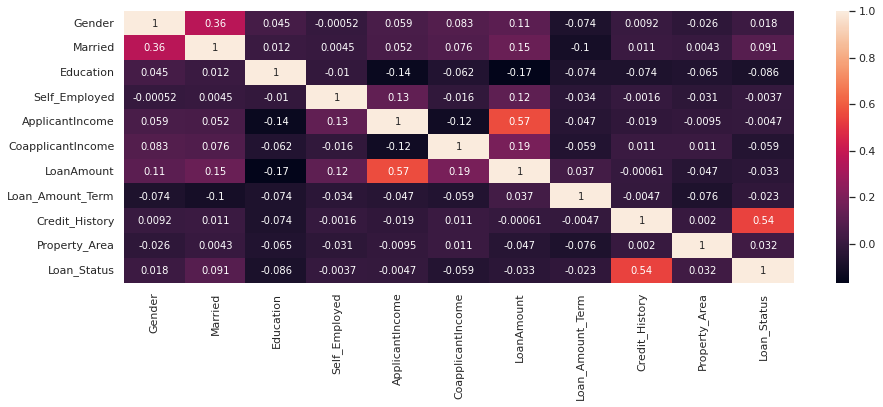

In [62]:
# Now lets plot heatmap to fetch the relationship between the variables
sns.heatmap(df.corr(), annot=True)
plt.gcf().set_size_inches(15,5)
plt.savefig('heatmap1.jpg')

* from the above heatmap, it is evident that the 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", 'Loan_ID', 'CoapplicantIncome', 'Dependents' doen't seems to have much correlation, so I'm dropping these features

In [63]:
cols = [ 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", 'Loan_ID', 'CoapplicantIncome', 'Dependents']
df = df.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,5849,1.0,2,1
1,1,1,0,0,4583,1.0,0,0
2,1,1,0,1,3000,1.0,2,1
3,1,1,1,0,2583,1.0,2,1
4,1,0,0,0,6000,1.0,2,1


#### splitting the data as dependent and independent features

In [64]:
X = df.loc[:, df.columns != 'Loan_Status']
y = df.loc[:,'Loan_Status']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [66]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((429, 7), (185, 7), (429,), (185,))

In [67]:
# metrics to evalute the model performance
def print_scores(y_true, y_pred):
    cm = confusion_matrix(y_true,y_pred)
    tn = cm[0,0]
    tp = cm[1,1]
    fp = cm[0,1]
    fn = cm[1,0]
    print(f"Overall Accuracy : {(tp + tn) / (tp + fp + tn + fn):.2f}")
    print(f"Recall : {tp / (tp + fn):.2f}")
    print(f"Specificity : {tn / (tn + fp):.2f}")   
    print(f"Positive Precision : {tp / (tp + fp):.2f}")
    print(f"Negative Precision : {tn / (tn + fn):.2f}")

In [68]:
# Classifier - 1 -- RANDOM FOREST
rf_max_depth = [int(x) for x in np.linspace(10, 30, num = 5)] #test different values for max_depth
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] 
param_grid = {
    'n_estimators': [5,10,15,20], # test forests of different sizes
    'max_depth': rf_max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = param_grid,
                cv = 5, n_jobs = -1)
rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 15, 20, 25, 30],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 10, 15, 20]})

In [69]:
print ('Random grid: ', param_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_)

Random grid:  {'n_estimators': [5, 10, 15, 20], 'max_depth': [10, 15, 20, 25, 30], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 15, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_depth': 15, 'bootstrap': True}


In [70]:
# Now lets build the model using the above obtained parameters
clf_rf = RandomForestClassifier(n_estimators=20, max_depth=20,
                       min_samples_split=10, min_samples_leaf=4, bootstrap = True)
clf_rf.fit(X_train,y_train)
y_pred = clf_rf.predict(X_test)
cv_scores = cross_val_score(clf_rf, X, y, cv=5)
print(cv_scores)
print('cv_score:', cv_scores.mean(), ' \n')
print_scores(y_test,y_pred)

[0.81300813 0.7804878  0.77235772 0.82113821 0.81967213]
cv_score: 0.801332800213248  

Overall Accuracy : 0.78
Recall : 0.97
Specificity : 0.42
Positive Precision : 0.75
Negative Precision : 0.90


[[ 27  38]
 [  3 117]]


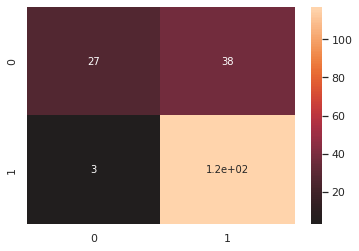

In [71]:
mat=confusion_matrix(y_test,y_pred)
print(mat)
sns.heatmap(mat,center=True,annot=True)

In [72]:
# classifer - 2 -- Decision Tree
param_grid = {
             'max_features' : ['log2' , 'sqrt' , 'auto'],
             'criterion' : ['entropy' , 'gini'],
             'max_depth' : [2,3,5,10,20,25,30,40],
             'min_samples_split': [2, 3, 10, 20],
              'min_samples_leaf': [1, 5, 8, 10]
             }
dt = DecisionTreeClassifier()
dt_random = RandomizedSearchCV(estimator = dt,param_distributions = param_grid,
                cv = 5, n_jobs = -1)
dt_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 5, 10, 20, 25, 30,
                                                      40],
                                        'max_features': ['log2', 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': [1, 5, 8, 10],
                                        'min_samples_split': [2, 3, 10, 20]})

In [73]:
print ('Random grid: ', param_grid, '\n')
# print the best parameters
print ('Best Parameters: ', dt_random.best_params_)

Random grid:  {'max_features': ['log2', 'sqrt', 'auto'], 'criterion': ['entropy', 'gini'], 'max_depth': [2, 3, 5, 10, 20, 25, 30, 40], 'min_samples_split': [2, 3, 10, 20], 'min_samples_leaf': [1, 5, 8, 10]} 

Best Parameters:  {'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'entropy'}


In [74]:
# Now lets build the model using the above obtained parameters
clf_dt = DecisionTreeClassifier(criterion='gini', max_depth=10,
                       min_samples_leaf=8, min_samples_split=2)
clf_dt.fit(X_train,y_train)
y_pred = clf_dt.predict(X_test)
cv_scores = cross_val_score(clf_dt, X, y, cv=5)
print(cv_scores)
print('cv_score:', cv_scores.mean(), ' \n')
print_scores(y_test,y_pred)

[0.71544715 0.74796748 0.71544715 0.7804878  0.80327869]
cv_score: 0.752525656404105  

Overall Accuracy : 0.72
Recall : 0.82
Specificity : 0.54
Positive Precision : 0.77
Negative Precision : 0.61


[[35 30]
 [22 98]]


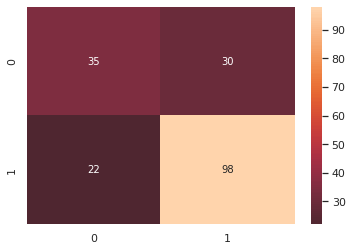

In [75]:
#plot confusion matrix
mat=confusion_matrix(y_test,y_pred)
print(mat)
sns.heatmap(mat,center=True,annot=True)

In [76]:
# Classifier - 3 -- GradientBoosting
clf_gb = GradientBoostingClassifier(n_estimators=5)
clf_gb.fit(X_train,y_train)
clf_gb.score(X_train,y_train)
y_pred = clf_gb.predict(X_test)
cv_scores = cross_val_score(clf_gb, X, y, cv=5)
print(cv_scores)
print('cv_score:', cv_scores.mean(), ' \n')
print_scores(y_test,y_pred)

[0.78861789 0.7804878  0.75609756 0.84552846 0.81967213]
cv_score: 0.7980807676929229  

Overall Accuracy : 0.75
Recall : 0.98
Specificity : 0.31
Positive Precision : 0.72
Negative Precision : 0.91


[[ 20  45]
 [  2 118]]


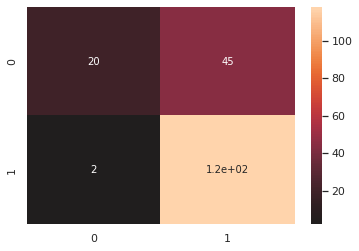

In [77]:
mat=confusion_matrix(y_test,y_pred)
print(mat)
sns.heatmap(mat,center=True,annot=True)

In [78]:
errors = {}
tree_counts = [3,5,8,10,15,20]
for count in tree_counts:
    model = GradientBoostingClassifier(n_estimators=count)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    errors[count] = 1 - score
errors

{3: 0.3513513513513513,
 5: 0.254054054054054,
 8: 0.24864864864864866,
 10: 0.24864864864864866,
 15: 0.23783783783783785,
 20: 0.2432432432432432}

Text(0, 0.5, 'Error')

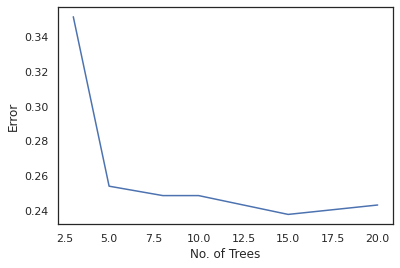

In [79]:
# plot to show error rate and no. of trees
plt.plot(list(errors.keys()), list(errors.values()))
plt.xlabel("No. of Trees")
plt.ylabel("Error")

In [80]:
# Classifier -4 -- XGBoost
from xgboost import XGBClassifier
clf_xgboost = XGBClassifier(n_estimators=500)
clf_xgboost.fit(X_train, y_train)
# predict
y_pred = clf_xgboost.predict(X_test)
print_scores(y_test,y_pred)

Overall Accuracy : 0.72
Recall : 0.90
Specificity : 0.40
Positive Precision : 0.73
Negative Precision : 0.68


[[ 26  39]
 [ 12 108]]


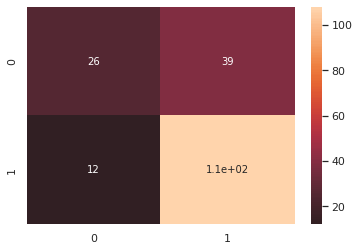

In [81]:
mat=confusion_matrix(y_test,y_pred)
print(mat)
sns.heatmap(mat,center=True,annot=True)

In [82]:
names = ['RandomForest','Decision Tree','GradientBoost', 'XGBoost']
classifiers =  [clf_rf, clf_dt, clf_gb, clf_xgboost ]
all_scores = {}
import warnings
warnings.filterwarnings('ignore')

In [83]:
for clf,name in zip(classifiers, names):
   scores = cross_val_score(clf,X,y,cv=5)
   print(scores)
   print(f"{name} = {scores.mean()*100:0.2f}")
   all_scores[name] = (scores.mean() * 100)

[0.80487805 0.76422764 0.76422764 0.82113821 0.81967213]
RandomForest = 79.48
[0.71544715 0.74796748 0.71544715 0.7804878  0.80327869]
Decision Tree = 75.25
[0.78861789 0.7804878  0.75609756 0.84552846 0.81967213]
GradientBoost = 79.81
[0.73170732 0.77235772 0.77235772 0.78861789 0.75409836]
XGBoost = 76.38


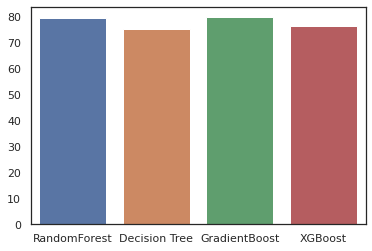

In [84]:
plt = sns.barplot(x = list(all_scores.keys()), y = list(all_scores.values()))
#ax = plt.set_xticklabels(labels = all_scores.keys(),rotation=60)

In [85]:
## Now lets arrange all the accuracy score obtained
accuracy = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree','Gradient Boosting ', 'XGBoost'],
    'Score': [np.round(accuracy_score(clf.predict(X_test) ,y_test) * 100, 3) for clf in classifiers ]})
accuracy.sort_values(by='Score', ascending=False)

,Model,Score
0,Random Forest,77.838
2,Gradient Boosting,74.595
3,XGBoost,72.432
1,Decision Tree,71.892


In [86]:
recall = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree','Gradient Boosting ', 'XGBoost'],
    'Score': [np.round(recall_score(clf.predict(X_test) ,y_test), 3) for clf in classifiers ]})
recall.sort_values(by='Score', ascending=False)

,Model,Score
1,Decision Tree,0.766
0,Random Forest,0.755
3,XGBoost,0.735
2,Gradient Boosting,0.724


In [87]:
precision = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree','Gradient Boosting ', 'XGBoost'],
    'Score': [np.round(precision_score(clf.predict(X_test) ,y_test), 3) for clf in classifiers ]})
precision.sort_values(by='Score', ascending=False)

,Model,Score
2,Gradient Boosting,0.983
0,Random Forest,0.975
3,XGBoost,0.900
1,Decision Tree,0.817
